In [1]:

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

import numpy as np


import pandas as pd


import seaborn as sns


import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from tensorflow import math




In [2]:
#reading the dataset
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/AER/Guns.csv")
data

,Unnamed: 0,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
0,1,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,Alabama,no
1,2,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,Alabama,no
2,3,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,Alabama,no
3,4,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,Alabama,no
4,5,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,Alabama,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1169,1995,254.2,2.1,17.9,254,1.485849,73.71621,15.37098,0.478447,14070.160,0.004927,Wyoming,yes
1169,1170,1996,249.7,3.3,20.4,289,1.521814,73.85796,15.44601,0.480085,14032.230,0.004944,Wyoming,yes
1170,1171,1997,255.2,3.5,17.7,310,1.527818,73.92731,15.49400,0.480031,14790.980,0.004943,Wyoming,yes
1171,1172,1998,247.6,4.8,16.2,326,1.558396,73.98515,15.51021,0.480045,15225.510,0.004944,Wyoming,yes


In [3]:
#cleaning the data
data_column_cleaned = data.copy()
del data_column_cleaned ["state"]
del data_column_cleaned ["year"]
del data_column_cleaned ["Unnamed: 0"]
data_column_cleaned

,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,law
0,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,no
1,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,no
2,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,no
3,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,no
4,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,no
...,...,...,...,...,...,...,...,...,...,...,...
1168,254.2,2.1,17.9,254,1.485849,73.71621,15.37098,0.478447,14070.160,0.004927,yes
1169,249.7,3.3,20.4,289,1.521814,73.85796,15.44601,0.480085,14032.230,0.004944,yes
1170,255.2,3.5,17.7,310,1.527818,73.92731,15.49400,0.480031,14790.980,0.004943,yes
1171,247.6,4.8,16.2,326,1.558396,73.98515,15.51021,0.480045,15225.510,0.004944,yes


In [4]:
#one hot encoding the label
data_column_cleaned.loc[data_column_cleaned["law"] == "no","law"] = 0
data_column_cleaned.loc[data_column_cleaned["law"] == "yes","law"] = 1
data_column_cleaned

,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,law
0,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,0
1,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,0
2,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,0
3,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,0
4,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,0
...,...,...,...,...,...,...,...,...,...,...,...
1168,254.2,2.1,17.9,254,1.485849,73.71621,15.37098,0.478447,14070.160,0.004927,1
1169,249.7,3.3,20.4,289,1.521814,73.85796,15.44601,0.480085,14032.230,0.004944,1
1170,255.2,3.5,17.7,310,1.527818,73.92731,15.49400,0.480031,14790.980,0.004943,1
1171,247.6,4.8,16.2,326,1.558396,73.98515,15.51021,0.480045,15225.510,0.004944,1


<AxesSubplot:>

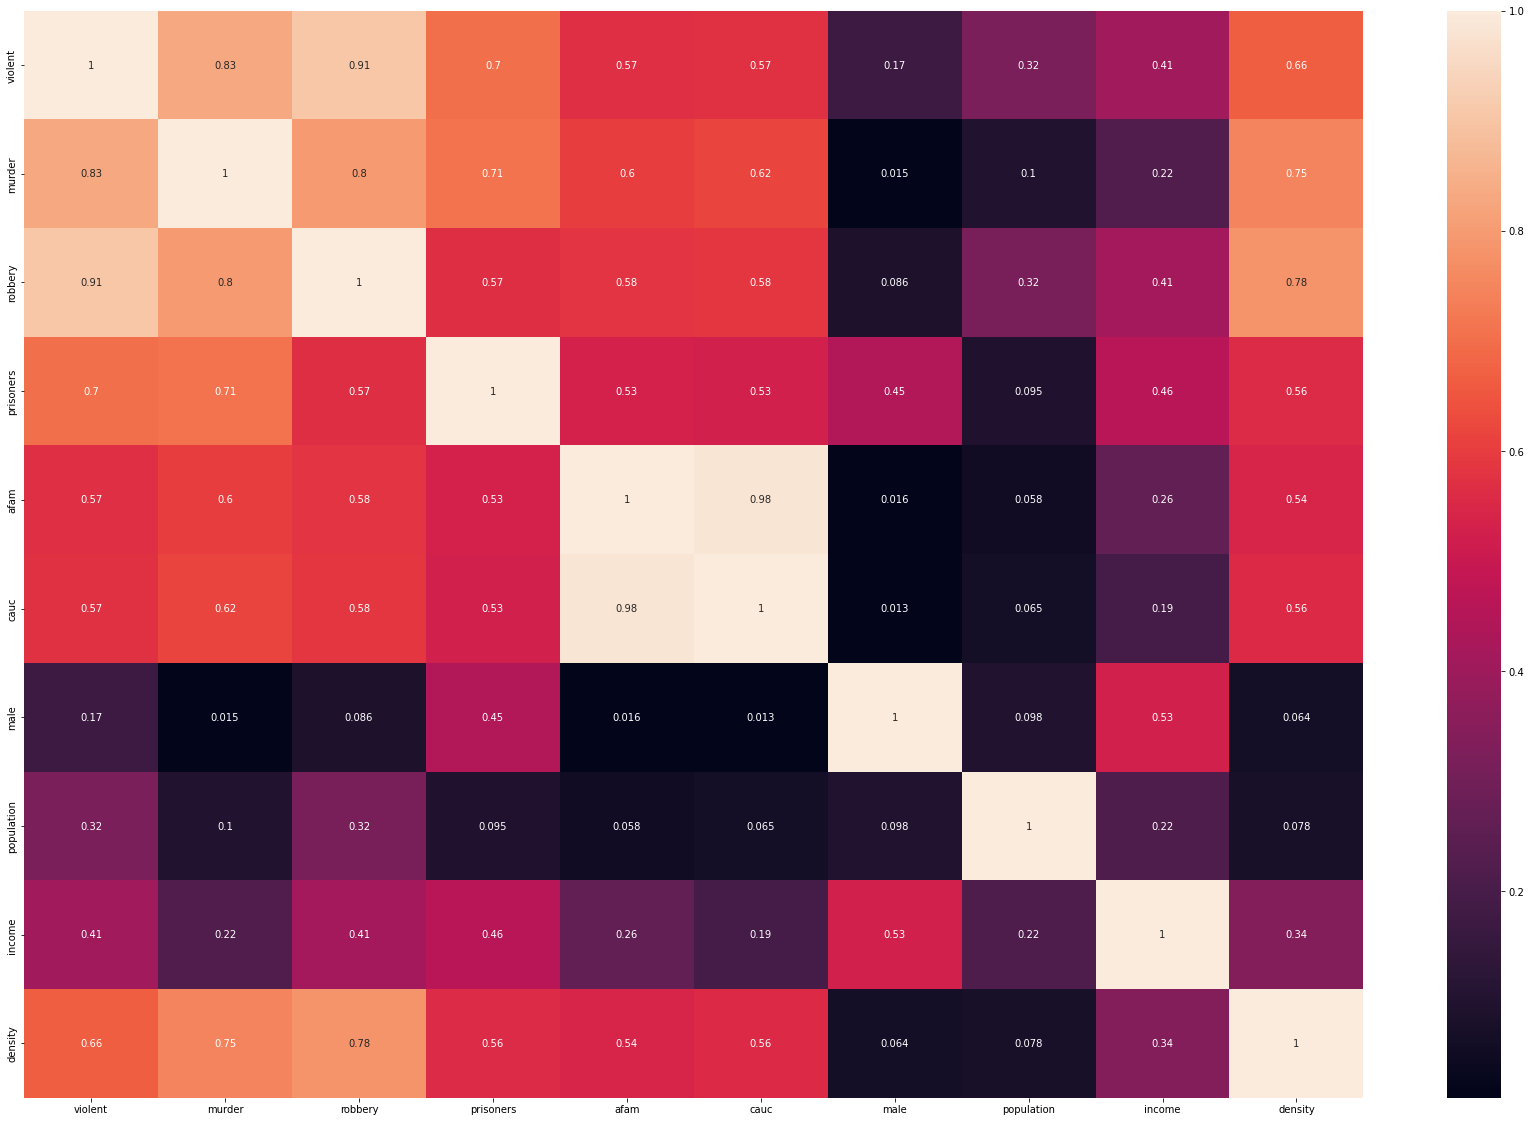

In [5]:
#creating a heatmap to display correlation between different features
plt.figure(figsize=(30,20))
sns.heatmap(data_column_cleaned.corr().abs(), annot=True)

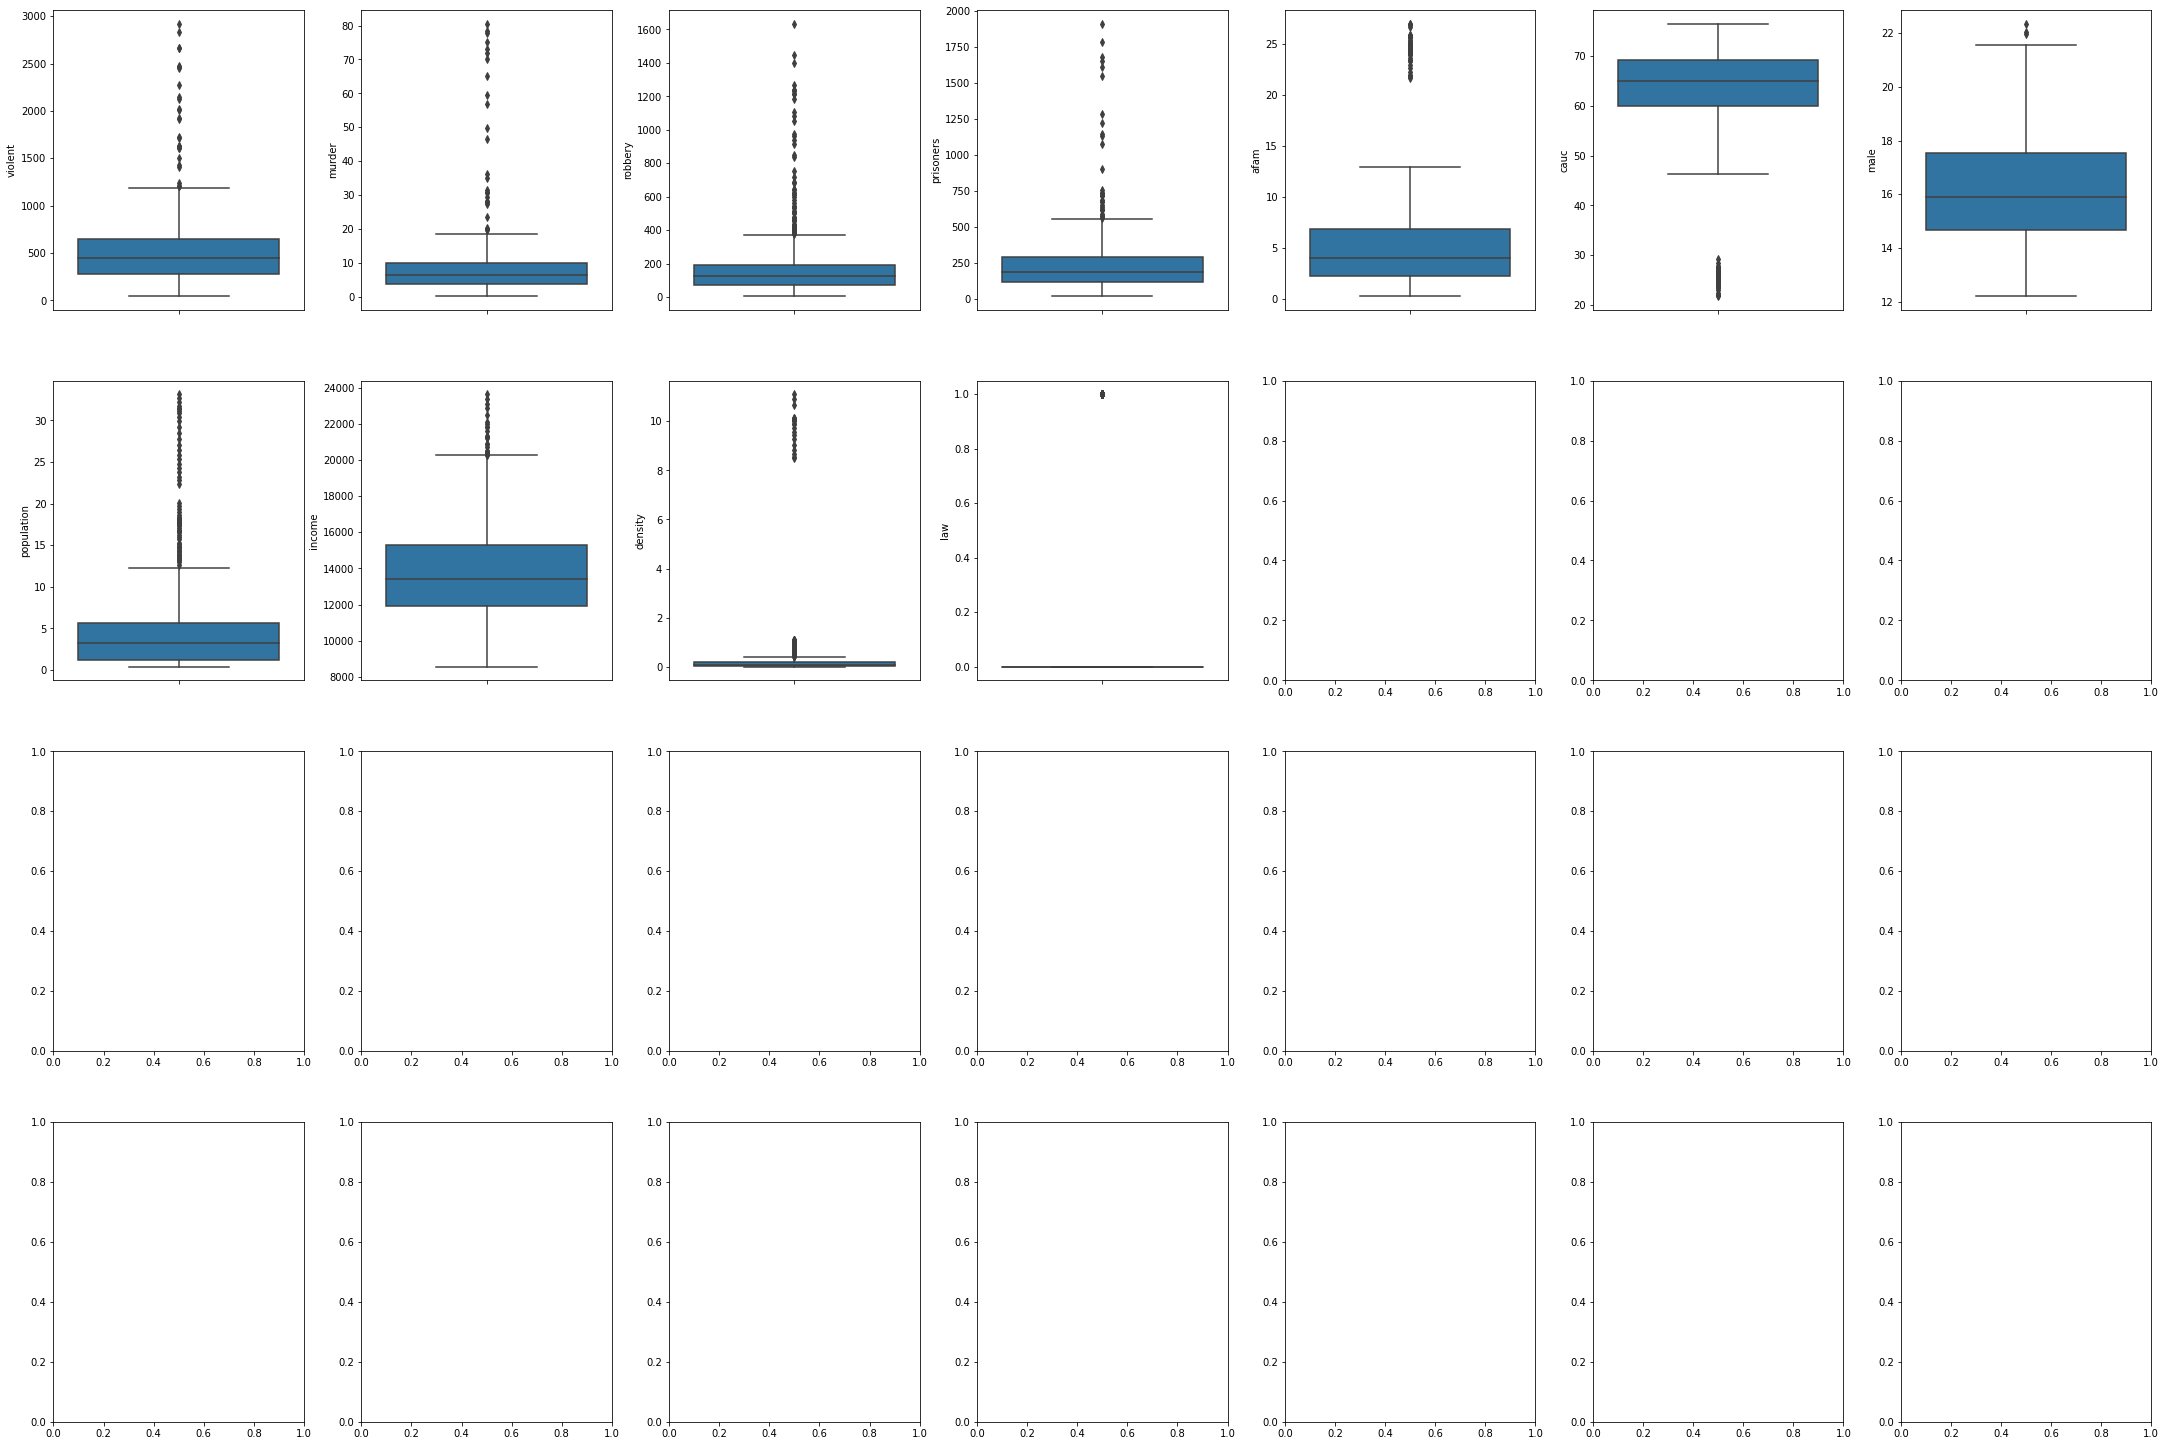

In [7]:
#creating box plots
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in data_column_cleaned.items():
    sns.boxplot(y=k, data=data_column_cleaned, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

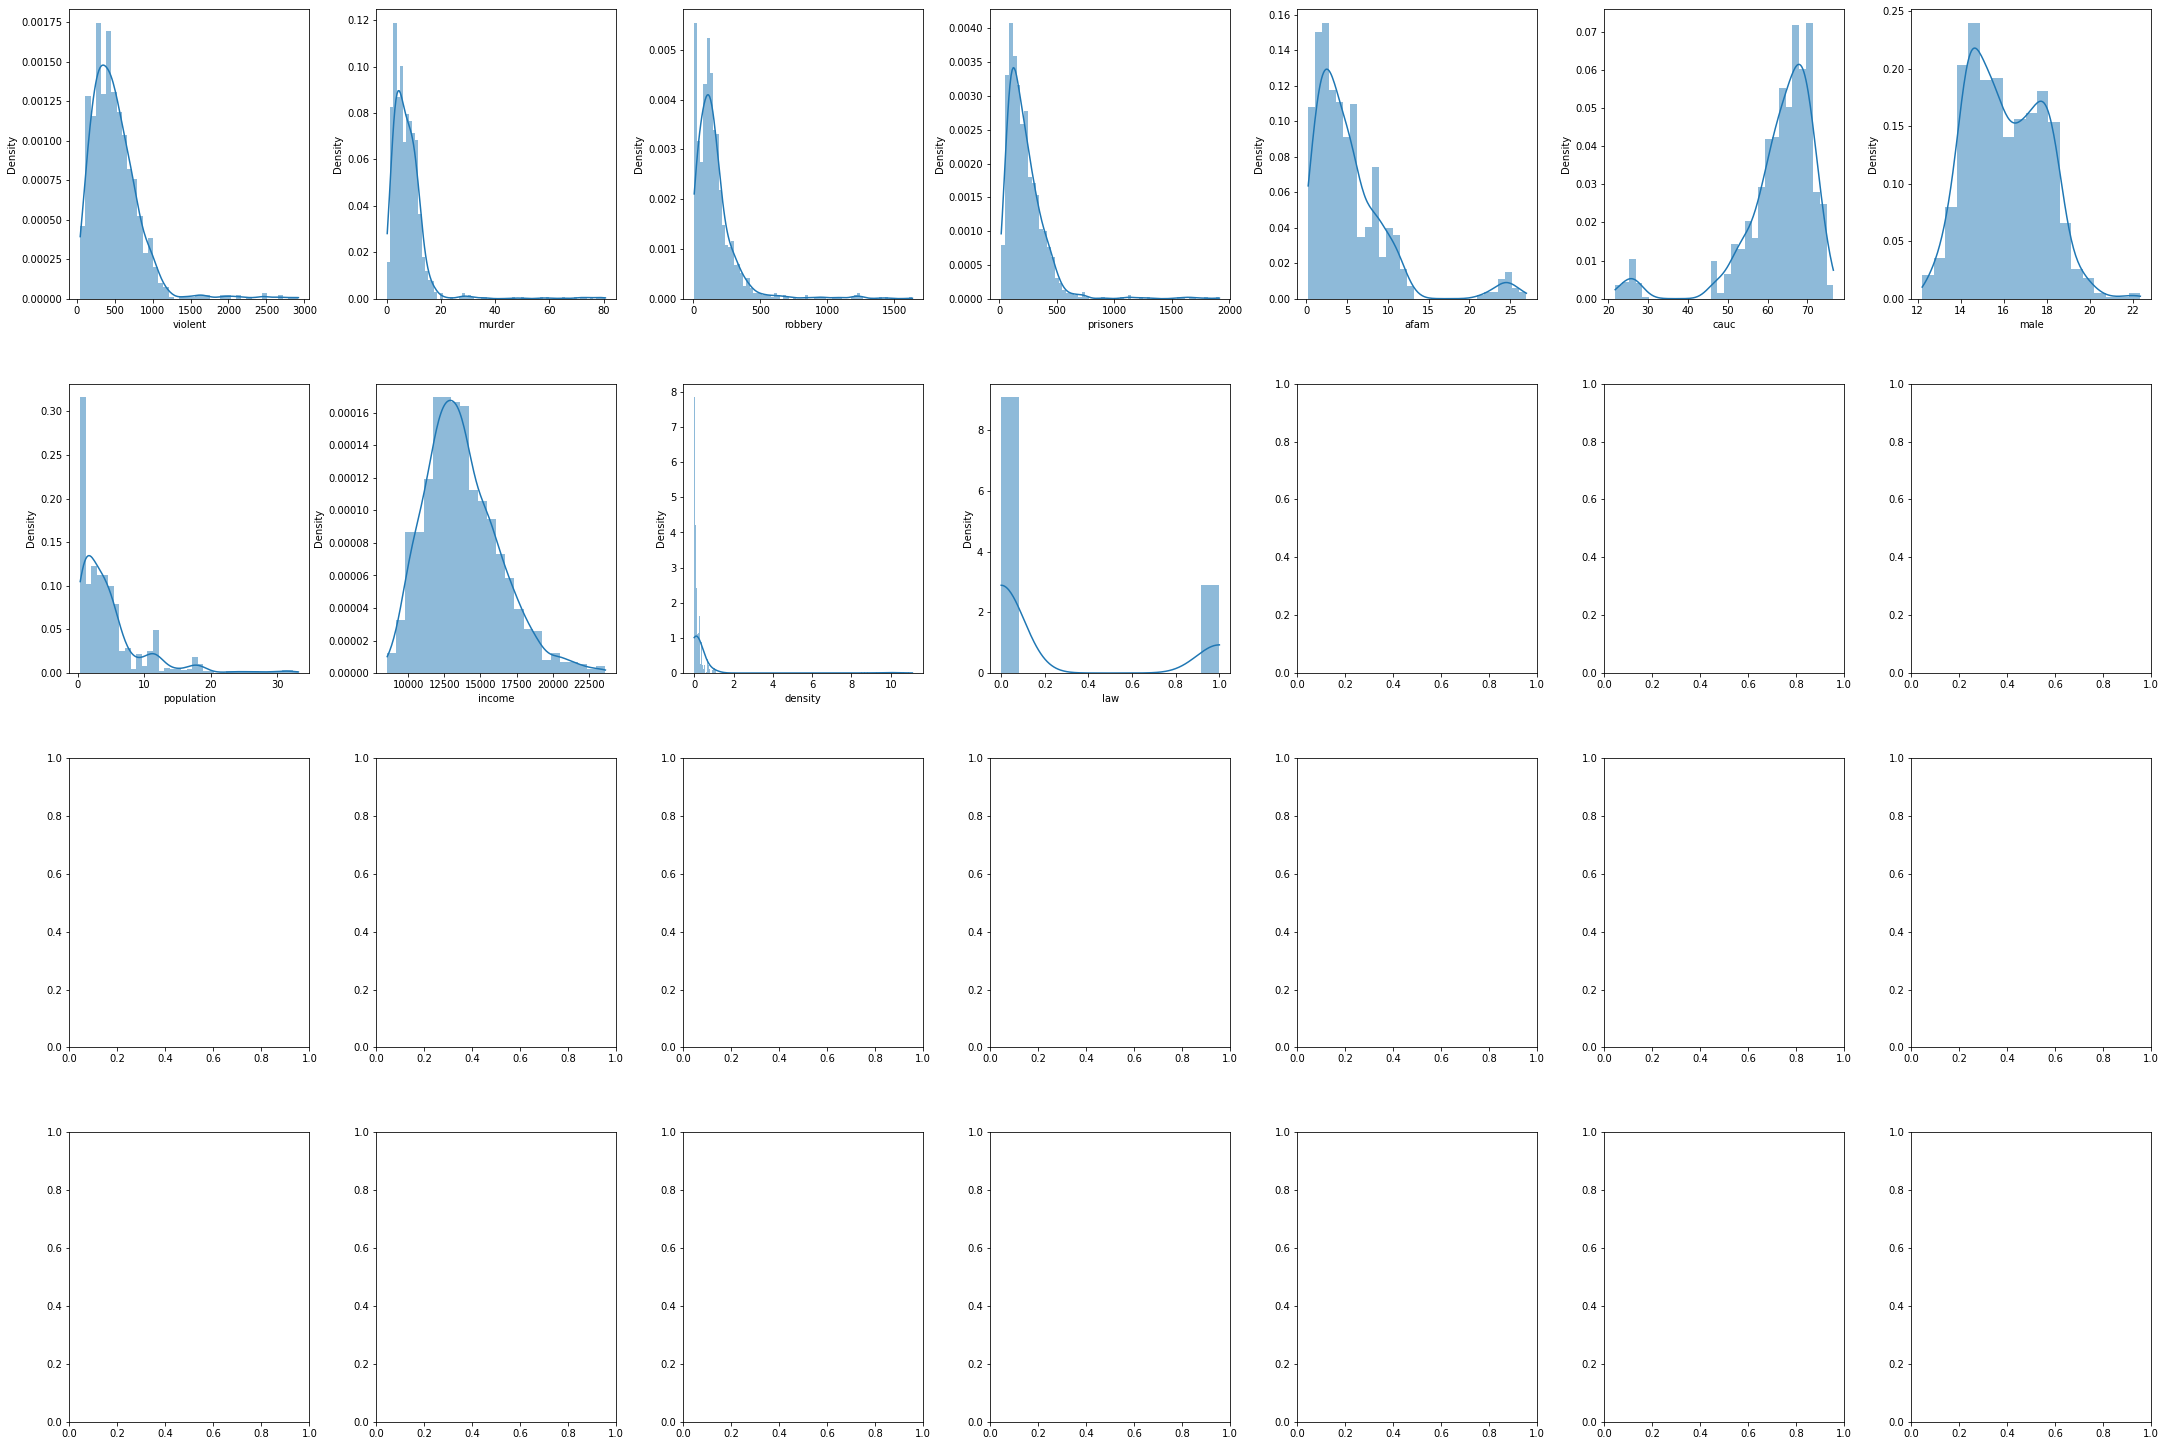

In [8]:
#creating histograms
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in data_column_cleaned.items():
    sns.histplot(v, ax=axs[index], kde=True, stat="density", linewidth=0)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [26]:
#normalising data

ct = make_column_transformer(
(MinMaxScaler(),["violent","murder","robbery","prisoners",
                 "afam","cauc","male","population","income","density"]),
)

In [27]:
#seperating the features and labels
X = data_column_cleaned.drop("law",axis=1)
y = data_column_cleaned["law"]


In [34]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=66)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
#X_train_normal
X_train_normal = np.asarray(X_train_normal).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test_normal = np.asarray(X_test_normal).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)


In [35]:
# Set random seed
tf.random.set_seed(66)

# Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# to the observed data 
# Metrics test the accuracy of the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
# Take the data and try to fit the data with 100 tries creating a trained model
history = model_1.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.6791
Epoch 2/100
30/30 [==============================] - 0s 966us/step - loss: 0.6681 - accuracy: 0.7484
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.7623
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.7633
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6137 - accuracy: 0.7633
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.7633
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7633
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.7633
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5254 - accuracy: 0.7633
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.7633
Epoch 1

In [36]:
model_1.evaluate(X_train_normal, y_train)

30/30 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8198


[0.409258097410202, 0.8198294043540955]

In [37]:
#Testing with the test data

loss, acc = model_1.evaluate(X_test_normal, y_test)
print(f"Model Loss (Test Set) : {loss}")
print(f"Model Accuracy (Test Set) : {acc}")

8/8 [==============================] - 0s 3ms/step - loss: 0.4892 - accuracy: 0.7574
Model Loss (Test Set) : 0.4892003834247589
Model Accuracy (Test Set) : 0.757446825504303
